# **Project 19: Air Quality Index Predictor**

***Pandas*** : *A powerful data manipulation and analysis library for Python, providing data structures like DataFrames.*

***NumPy*** : *A fundamental package for numerical computing in Python, offering support for large multi-dimensional arrays and matrices.*

***Warnings*** : *A module in Python to issue alerts and warnings to the developer regarding potential issues in the code.*

***Matplotlib*** : *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

***Seaborn*** : *A Python visualization library based on Matplotlib, providing a high-level interface for drawing attractive statistical graphics.*

# **Data Loading**

**We import these libraries for Data Loading, Data Cleaning, Data Visualization and EDA (Explorotory Data Analysis).**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**warnings.simplefilter("ignore"): Suppresses all warnings of any type in the code, effectively ignoring them.**

In [ ]:
warnings.simplefilter("ignore")

**df = pd.read_csv("/content/AQI Data.csv"): Reads a CSV file named "AQI Data.csv" into a Pandas DataFrame.**

**df.head(5): Displays the first five rows of the DataFrame.**

In [ ]:
df = pd.read_csv("/content/AQI Data.csv")
df.head(5)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


### **Let Us Understand What These Abbreviations Stand For :**

- **T  = Average annual temperature**
- **TM = Annual average maximum temperature**
- **Tm = Average annual minimum temperature**
- **SLP = Sea Level Pressure**
- **H = Humidity**
- **VV = Average Visibility**
- **V = Annual average wind speed**
- **VM = Maximum wind speed**
- **PM 2.5 : This is our Dependent variable i.e. our Air Quality Index**

**df.shape: Returns the dimensions of the DataFrame as a tuple, showing the number of rows and columns.**

In [ ]:
df.shape

(1093, 9)

**df.isnull().sum(): Returns the count of missing (null) values in each column of the DataFrame.**

In [ ]:
df.isnull().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,1


**df = df.dropna(): Removes all rows from the DataFrame that contain any missing (null) values.**

**df.isnull().sum(): Returns the count of missing (null) values in each column of the cleaned DataFrame, which should now be zero for all columns.**

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,0


**df.info(): Provides a concise summary of the DataFrame, including the number of non-null entries, column data types, and memory usage.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1092 non-null   float64
 1   TM      1092 non-null   float64
 2   Tm      1092 non-null   float64
 3   SLP     1092 non-null   float64
 4   H       1092 non-null   float64
 5   VV      1092 non-null   float64
 6   V       1092 non-null   float64
 7   VM      1092 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 85.3 KB


# **Data Visualization**

**plt.figure(figsize=(9, 8)): Creates a new figure with a specified size of 9 inches by 8 inches for the plot.**

**sns.histplot(df['PM 2.5'], color='g', bins=100): Draws a histogram of the 'PM 2.5' column from the DataFrame using Seaborn, with green color and 100 bins.**

**This graph illustrates the air quality index categorized by PM 2.5 levels, where higher index values indicate more dangerous air quality. The PM 2.5 concentration is predominantly between 50 to 100, indicating relatively good air quality suitable for breathing.**

<Axes: xlabel='PM 2.5', ylabel='Count'>

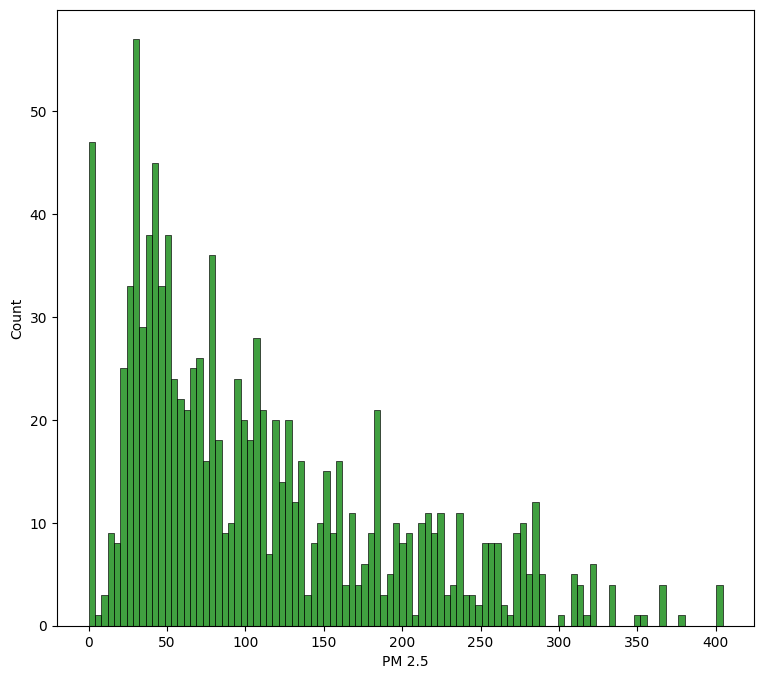

In [ ]:
plt.figure(figsize=(9, 8))
sns.histplot(df['PM 2.5'], color='g', bins=100)

**plt.figure(figsize=(8, 8)): Creates a new figure with a specified size of 8 inches by 8 inches for the plot.**

**sns.heatmap(df.corr(), annot=True, cmap="RdYlGn"): Generates a heatmap to visualize the correlation matrix of the DataFrame, with annotations showing correlation coefficients and a colormap ranging from red to yellow to green.**

<Axes: >

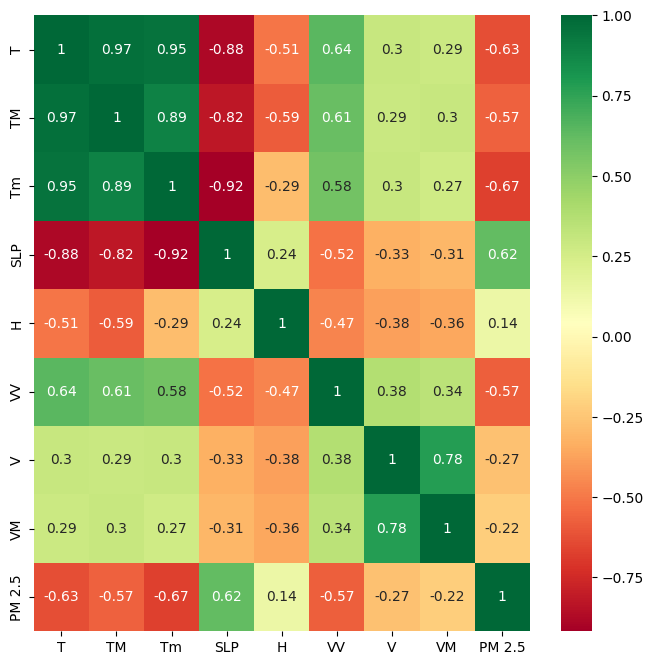

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

**df.columns: Returns an index object containing column labels of the DataFrame df, showing all column names present in the DataFrame.**

In [ ]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

# **Model Building**

**X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]: Creates a new DataFrame X containing specific columns 'T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM' from the original DataFrame df.**

**y = df[["PM 2.5"]]: Creates a new DataFrame y containing the column 'PM 2.5' from the original DataFrame df.**

In [ ]:
X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]

y = df[["PM 2.5"]]

**Scaler_X = MinMaxScaler().set_output(transform="pandas"): Creates an instance Scaler_X of MinMaxScaler that scales input data using the Min-Max scaling method and outputs a Pandas DataFrame.**

**X = Scaler_X.fit_transform(X): Applies Min-Max scaling to the DataFrame X, transforming each feature to a specified range (default is [0, 1]).**

**Scaler_y = MinMaxScaler().set_output(transform="pandas"): Creates an instance Scaler_y of MinMaxScaler that scales input data using the Min-Max scaling method and outputs a Pandas DataFrame.**

**y = Scaler_y.fit_transform(y): Applies Min-Max scaling to the DataFrame y, transforming the target variable 'PM 2.5' to a specified range (default is [0, 1]).**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform = "pandas")

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform = "pandas")

y = Scaler_y.fit_transform(y)

**from sklearn.model_selection import train_test_split: Imports a function to split datasets into training and testing sets for model validation.**

**from sklearn.metrics import mean_squared_error: Imports a function to calculate the mean squared error, a common metric for evaluating regression models.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80): Splits the features (X) and target variable (y) into training and testing sets (X_train, X_test, y_train, y_test) with 80% of the data used for training and 20% for testing.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

**1: Model Initialization: Initializes a linear regression model (LR) with an intercept term (fit_intercept=True).**

**2: Model Training: Fits the linear regression model (LR) to the training data (X_train, y_train).**

**3: Prediction: Predicts the target variable (y_pred) for the test data (X_test) using the trained linear regression model (LR).**

**4: Evaluation: Computes the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_pred).**

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Linear Regression Mean Squared Error: ", MSE)

Linear Regression Mean Squared Error:  0.0204477127666321


**1: Model Initialization: Initializes a Random Forest regressor (RFR) with 20 decision trees (n_estimators=20).**

**2: Model Training: Fits the Random Forest regressor (RFR) to the training data (X_train, y_train).**

**3: Prediction: Predicts the target variable (y_pred) for the test data (X_test) using the trained Random Forest regressor (RFR).**

**4: Evaluation: Computes the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_pred).**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=20)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Random Forest Mean Squared Error: ", MSE)

Random Forest Mean Squared Error:  0.006924787863321352


**1: Model Initialization: Initializes a Decision Tree regressor (DTR) with a minimum of 10 samples per leaf and a maximum depth of 20 (min_samples_leaf=10, max_depth=20).**

**2: Model Training: Fits the Decision Tree regressor (DTR) to the training data (X_train, y_train).**

**3: Prediction: Predicts the target variable (y_pred) for the test data (X_test) using the trained Decision Tree regressor (DTR).**

**4: Evaluation: Computes the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_pred).**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(min_samples_leaf=10, max_depth=20)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Decision Tree Mean Squared Error: ", MSE)

Decision Tree Mean Squared Error:  0.012417833223389256


**1: Model Initialization: Initializes a Support Vector Regressor (svr) with a regularization parameter C set to 1.0 (C=1.0).**

**2: Model Training: Fits the Support Vector Regressor (svr) to the training data (X_train, y_train).**

**3: Prediction: Predicts the target variable (y_pred) for the test data (X_test) using the trained Support Vector Regressor (svr).**

**4: Evaluation: Computes the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_pred).**

In [ ]:
from sklearn.svm import SVR

svr = SVR(C=1.0)

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("SVR Mean Squared Error: ", MSE)

SVR Mean Squared Error:  0.015570439144910242


**1: Model Initialization: Initializes a Lasso regression model (Ls) with a regularization strength alpha set to 1.0 (alpha=1.0).**

**2: Model Training: Fits the Lasso regression model (Ls) to the training data (X_train, y_train).**

**3: Prediction: Predicts the target variable (y_pred) for the test data (X_test) using the trained Lasso regression model (Ls).**

**4: Evaluation: Computes the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_pred).**

In [ ]:
from sklearn.linear_model import Lasso

Ls = Lasso(alpha=1.0)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Lasso Mean Squared Error: ", MSE)

Lasso Mean Squared Error:  0.04675528946164902


# **Conclusion:**

- **Linear Regression Mean Squared Error:  0.0204**
- **Random Forest Mean Squared Error:  0.0069**
- **Decision Tree Mean Squared Error:  0.0124**
- **SVR Mean Squared Error:  0.0155**
- **Lasso Mean Squared Error:  0.0467**

**The Random Forest Regressor (RFR) performed the best among the models, with the lowest error (0.0069) indicating higher accuracy compared to other models such as Linear Regression (0.0204), Decision Tree (0.0124), Support Vector Regressor (0.0155), and Lasso (0.0467).**

**Therefore, the Random Forest Regressor is recommended as it achieved the highest accuracy in predicting the outcome.**

# **Save Model**

**import pickle: Imports the pickle module for object serialization.**

**with open("Finalized-Model.pickle", "wb") as file:: Opens "Finalized-Model.pickle" file in binary write mode.**

**This code saves the trained Scaler_X object to a file (Scaler_X.pickle) so it can be reused later without retraining.**

**Serializes and saves the trained target (y) MinMaxScaler to disk so it can be reused later for inverse-transforming model predictions back to real AQI values.**

In [29]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)

with open("Scaler_X.pickle", "wb") as file:
  pickle.dump(Scaler_X, file)

with open("Scaler_y.pickle", "wb") as file:
  pickle.dump(Scaler_y, file)